## **IMAGE CLASSIFICATION USING CNN** 
1. In this project im using CIFAR10 data set.
2. Here we get images of 10 different classes.
3. In this project i have used Convolutional Neural Network to do the prediction of class of as image.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)


* The training samples are 50,000 each sample of 32 * 32 and 3RGB chanels

In [ ]:
X_test.shape

(10000, 32, 32, 3)

* The testing samples are 10,000 each sample of 32 * 32 and 3RGB chanels

In [ ]:
y_train.shape

(50000, 1)

* The y train samples are 50,000

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

* Here direct categories are needed not 2D array so reshaping the y_train

## **Data Exploration**

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_img(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])  

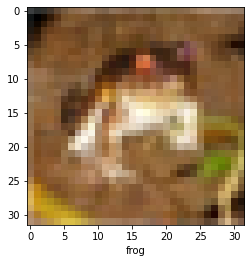

In [ ]:
plot_img(X_train, y_train, 0)

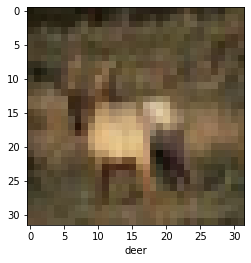

In [ ]:
plot_img(X_train, y_train, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train / 255
X_test  = X_test / 255

* Normalizing the data by deviding each pixel values by 255.0 to make pixel values ranging between 0 and 1

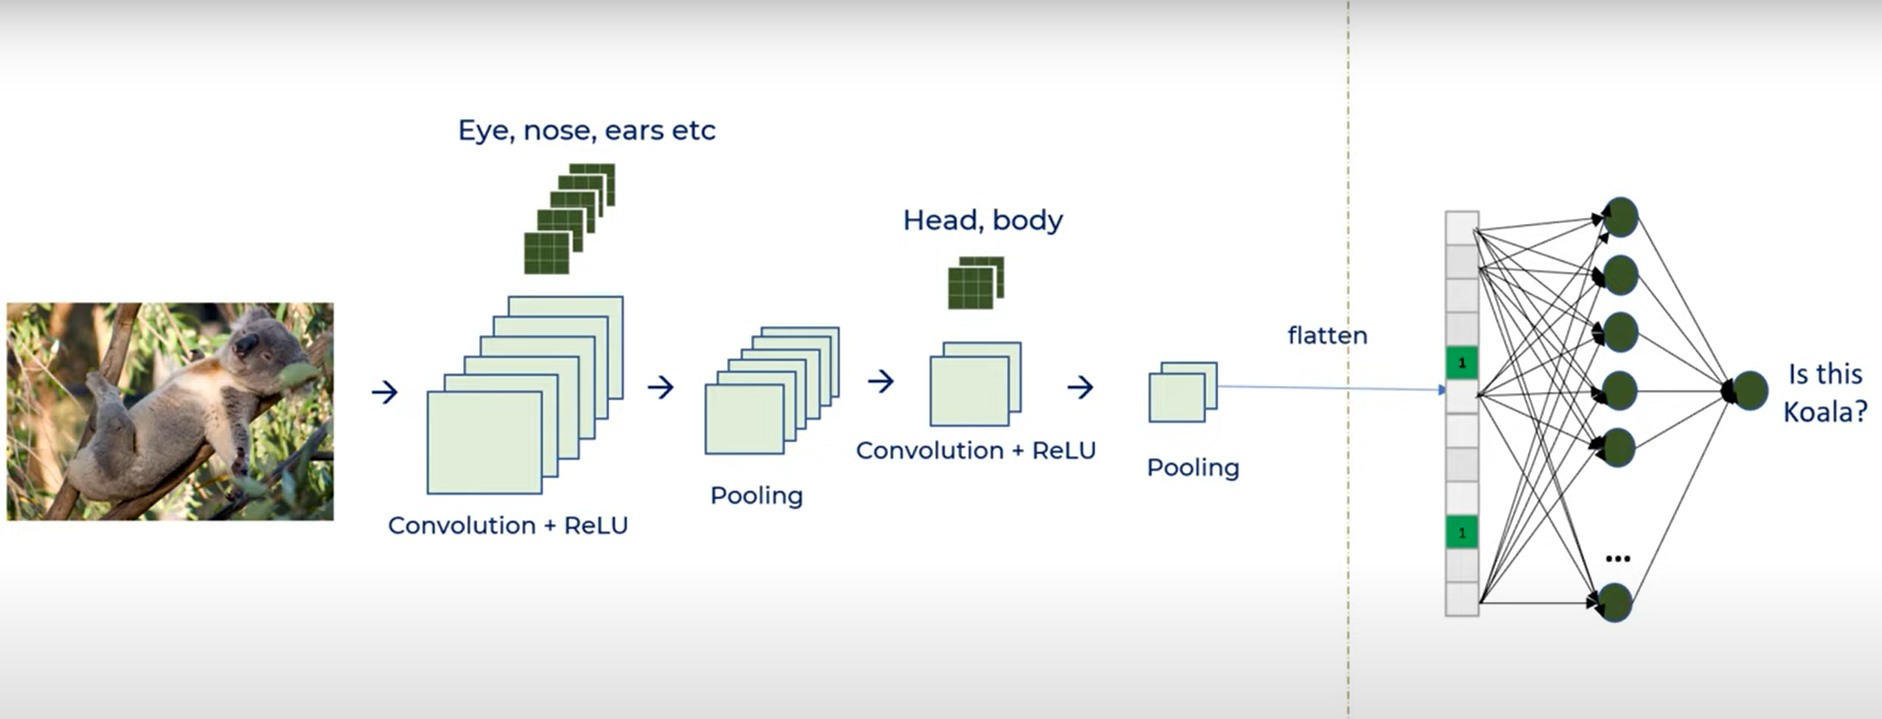

## Model Building
  The above image shows how the CNN works. There an image of koala which is our input, lets go through the step by step procedure of building the model.
1. we have all the pixels of the image in between 0 and 1. 
2. i have created 2 convolutional layes with 3*3 kernel size, 32 and 64 filters with relu activation function. 
3. used MaxPool for optimizing the image size with (2,2) strides.
4. Flattening-  As the name of this step implies, we are literally going to flatten our pooled feature map into a column.The reason we do this is that we're going to need to insert this data into an artificial neural network.
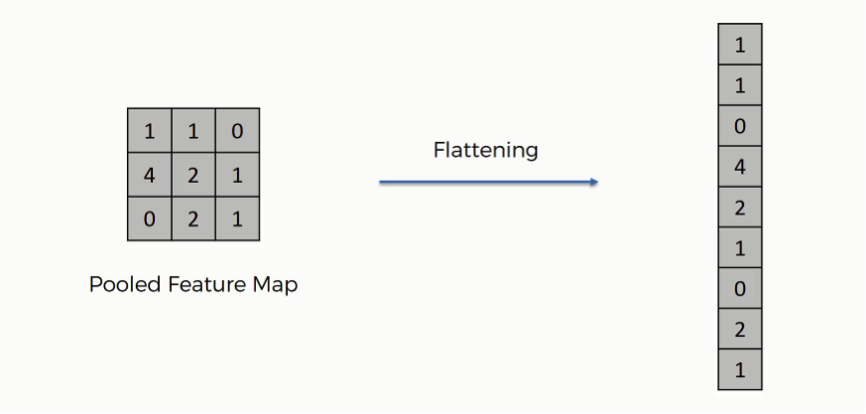 

5. 
Connecting CNN to ANN - After CNN The input layer of ANN contains the vector of data that was created in the flattening step.
The role of the artificial neural network is to take this data and combine the features into a wider variety of attributes through the fully connected hidden layer and give the predicted output. 

In [ ]:
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

In [ ]:
model = Sequential()

#CNN 

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(2,2))

#Dense

model.add(Flatten())
model.add(Dense(64, activation="relu"))
#model.add(Dense(32, activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 48s 3ms/step - loss: 1.6983 - accuracy: 0.3825
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1617 - accuracy: 0.5896
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0035 - accuracy: 0.6490
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9109 - accuracy: 0.6827
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8366 - accuracy: 0.7105
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7829 - accuracy: 0.7297
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7375 - accuracy: 0.7447
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6851 - accuracy: 0.7591
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6509 - accuracy: 0.7724
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.60

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0500 - accuracy: 0.6895


[1.049961805343628, 0.6894999742507935]

In [ ]:
y_predict = [np.argmax(element) for element in y_pred]
y_predict[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

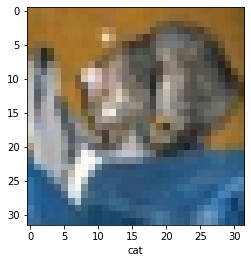

In [ ]:
plot_img(X_test, y_test, 0)

In [ ]:
classes[y_predict[0]]

'cat'

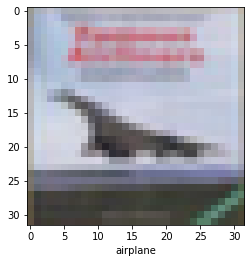

In [ ]:
plot_img(X_test, y_test, 3)

In [ ]:
classes[y_predict[3]]

'airplane'